In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

from sklearn.model_selection import train_test_split

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

import cv2


# 示例函数
# def unpickle(file):
#     import pickle
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

# 打开cifar-10数据集文件目录
def unpickle(file):
    import pickle
    with open("D:/ai/training examples/cifar-10-python/cifar-10-batches-py/"+file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_batch=unpickle("data_batch_1")

In [3]:
data_batch

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

In [4]:
cifar_label=data_batch[b'labels']
cifar_data=data_batch[b'data']

#把字典的值转成array格式，方便操作
cifar_label=np.array(cifar_label)
print(cifar_label.shape)
cifar_data=np.array(cifar_data)
print(cifar_data.shape)
X_train, X_test, y_train, y_test = train_test_split(cifar_data[0:2000],cifar_label[0:2000],test_size=0.2, random_state=1)
X_train=X_train/255
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)
label_name=['airplane','automobile','brid','cat','deer','dog','frog','horse','ship','truck']

(10000,)
(10000, 3072)
X_train.shape (1600, 3072) y_train.shape (1600,)
X_test.shape (400, 3072) y_test.shape (400,)


In [5]:
print(X_train[1:10])
print(y_train[1:10])


[[1.   1.   1.   ... 0.95 0.97 0.99]
 [1.   0.98 0.98 ... 0.99 0.99 0.99]
 [0.21 0.24 0.23 ... 0.47 0.46 0.44]
 ...
 [0.05 0.05 0.04 ... 0.89 0.88 0.89]
 [0.31 0.34 0.38 ... 0.43 0.41 0.38]
 [0.18 0.2  0.3  ... 0.45 0.44 0.53]]
[4 2 6 8 2 0 1 8 4]


In [6]:
# GRADED CELL: eval_cat_err
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
  
    ### START CODE HERE ### 
    cerr=np.sum((y!=yhat))/m    
    print(cerr)
    ### END CODE HERE ### 
    
    return(cerr)

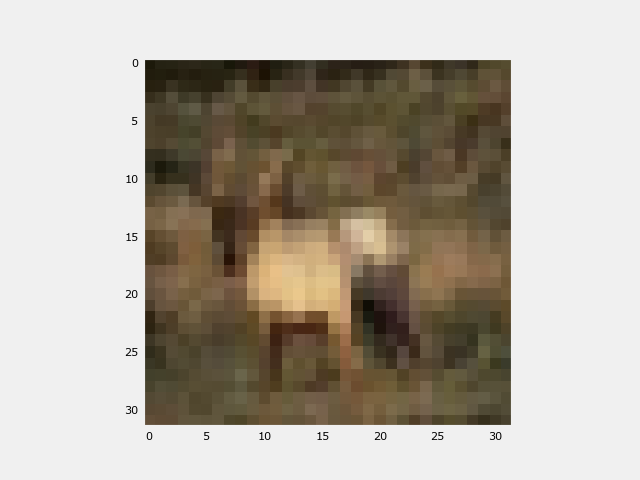

In [7]:
image = cifar_data[3]
# 分离出r,g,b：3*1024
image = image.reshape(-1,1024)
r = image[0,:].reshape(32,32) #红色分量
g = image[1,:].reshape(32,32) #绿色分量
b = image[2,:].reshape(32,32) #蓝色分量

# 特别注意点：cv2模块可以接受numpy数组,需要注意的是将 0-255 归一化到 0-1 ！！！
# 因此,您应该在代码中除以255

img = np.zeros((32,32,3))
img[:,:,0]=r/255
img[:,:,1]=g/255
img[:,:,2]=b/255
plt.imshow(img)


In [8]:

model_s = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units=3072,activation='relu'),
        Dense(units=500,activation='relu'),
        Dense(units=300,activation='relu'),
        Dense(units=300,activation='relu'),
        Dense(units=200,activation='relu'),
        Dense(units=100,activation='relu'),
        Dense(units=50,activation='relu'),
        Dense(units=10,activation='linear')
        ### END CODE HERE ### 
    ], name = "classification"
)
model_s.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    ### START CODE HERE ### 
)


In [9]:

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=100
)

Epoch 1/100


50/50 [==============================] - 2s 30ms/step - loss: 2.3644
Epoch 2/100
50/50 [==============================] - 2s 30ms/step - loss: 2.3031
Epoch 3/100
50/50 [==============================] - 2s 30ms/step - loss: 2.2933
Epoch 4/100
50/50 [==============================] - 2s 30ms/step - loss: 2.2301
Epoch 5/100
50/50 [==============================] - 2s 30ms/step - loss: 2.1527
Epoch 6/100
50/50 [==============================] - 2s 31ms/step - loss: 2.1036
Epoch 7/100
50/50 [==============================] - 2s 31ms/step - loss: 2.0920
Epoch 8/100
50/50 [==============================] - 2s 31ms/step - loss: 2.0682
Epoch 9/100
50/50 [==============================] - 2s 31ms/step - loss: 2.0526
Epoch 10/100
50/50 [==============================] - 2s 31ms/step - loss: 2.0584
Epoch 11/100
50/50 [==============================] - 2s 31ms/step - loss: 2.0182
Epoch 12/100
50/50 [==============================] - 2s 31ms/step - loss: 2.0166
Epoch 13/100
50/50 [=================

In [13]:
# BEGIN UNIT TEST
model_s.summary()
# END UNIT TEST

Model: "classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3072)              9440256   
                                                                 
 dense_1 (Dense)             (None, 500)               1536500   
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dense_3 (Dense)             (None, 300)               90300     
                                                                 
 dense_4 (Dense)             (None, 200)               60200     
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 50)             

In [14]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)

In [15]:
y_train_predicted=model_predict(X_train)
y_test_predicted=model_predict(X_test)

training_cerr_complex = eval_cat_err(y_train, y_train_predicted)
test_cerr_complex = eval_cat_err(y_test, y_test_predicted)
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, test,       complex model: {test_cerr_complex:0.3f}")
correct_rate_train=np.sum(y_train_predicted==y_train)/y_train.shape[0]
correct_rate_test=np.sum(y_test_predicted==y_test) /y_test.shape[0]
print(f"the correct rate of y_train is {correct_rate_train:0.3f}")
print(f"the correct rate of y_test is {correct_rate_test:0.3f}")
print(y_train_predicted[1:100])
print(y_train[1:100])


13/13 [==============================] - 0s 8ms/step
0.025
0.6875
categorization error, training, complex model: 0.025
categorization error, test,       complex model: 0.688
the correct rate of y_train is 0.975
the correct rate of y_test is 0.312
[2 2 6 0 2 0 1 8 4 4 5 1 8 0 5 7 1 1 1 5 0 8 3 0 5 5 0 9 7 1 6 6 2 8 1 2 9
 8 8 5 9 5 3 7 3 2 6 3 4 4 9 3 5 7 2 6 9 9 6 3 0 7 1 6 4 9 7 2 0 5 2 8 2 7
 5 0 9 6 5 4 6 9 0 5 2 2 3 4 4 2 7 5 2 4 7 4 3 1 7]
[4 2 6 8 2 0 1 8 4 4 5 1 0 0 5 7 1 1 1 5 0 8 3 0 5 5 0 9 7 1 6 6 2 8 1 2 9
 8 8 5 9 5 3 7 3 2 6 3 4 4 9 3 5 7 2 6 9 9 6 3 0 7 1 6 4 9 7 2 0 5 2 8 2 7
 5 0 9 6 5 4 6 9 0 5 2 2 3 4 4 2 7 5 2 4 7 4 3 1 7]
